# Análisis del Dataset Superstore 2012

Este notebook realiza un análisis exploratorio de datos del dataset Superstore 2012, incluyendo visualizaciones univariantes, bivariantes y multivariantes usando Matplotlib y Seaborn.

## 1. Importar bibliotecas y cargar datos

In [18]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuración general
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')  # Estilo visual atractivo
sns.set_palette('Set2')  # Paleta de colores coherente

# Cargar el dataset
df = pd.read_csv('superstore_dataset2012.csv', encoding='latin-1')

print("Dataset cargado exitosamente!")
print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")

Dataset cargado exitosamente!
Dimensiones: 4246 filas x 24 columnas


## 2. Exploración y Preparación de Datos

Analizamos la estructura del dataset, tipos de datos, valores nulos y realizamos las transformaciones necesarias.

In [19]:
# Vista inicial de los datos
print("=== PRIMERAS 5 FILAS DEL DATASET ===")
df.head()

=== PRIMERAS 5 FILAS DEL DATASET ===


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,21896,ID-2012-71858,1/2/2012,7/2/2012,Standard Class,CP-12085,Cathy Prescott,Corporate,Jakarta,Jakarta,...,TEC-PH-10003784,Technology,Phones,"Motorola Signal Booster, with Caller ID",593.9895,5,0.17,-71.7105,52.22,Medium
1,4323,MX-2012-154459,1/2/2012,6/2/2012,Standard Class,JF-15190,Jamie Frazer,Consumer,Santiago,Santiago,...,TEC-PH-10002102,Technology,Phones,"Nokia Headset, Cordless",151.9200,3,0.00,71.4000,32.94,High
2,2829,MX-2012-114461,1/2/2012,5/2/2012,Standard Class,RM-19375,Raymond Messe,Consumer,Escuintla,Escuintla,...,TEC-AC-10002760,Technology,Accessories,"Memorex Memory Card, Erganomic",200.1600,3,0.00,0.0000,28.95,High
3,2828,MX-2012-114461,1/2/2012,5/2/2012,Standard Class,RM-19375,Raymond Messe,Consumer,Escuintla,Escuintla,...,FUR-CH-10001423,Furniture,Chairs,"Harbour Creations Rocking Chair, Black",192.8800,2,0.00,54.0000,19.27,High
4,6762,MX-2012-151904,1/2/2012,3/2/2012,First Class,DJ-13420,Denny Joy,Corporate,Villa Canales,Guatemala,...,OFF-PA-10003571,Office Supplies,Paper,"Enermax Cards & Envelopes, Recycled",94.0200,3,0.00,1.8600,10.73,Medium


In [20]:
# Información sobre tipos de datos y valores no nulos
print("=== INFORMACIÓN DEL DATASET ===")
df.info()

=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4246 entries, 0 to 4245
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          4246 non-null   int64  
 1   Order ID        4246 non-null   object 
 2   Order Date      4246 non-null   object 
 3   Ship Date       4246 non-null   object 
 4   Ship Mode       4246 non-null   object 
 5   Customer ID     4246 non-null   object 
 6   Customer Name   4246 non-null   object 
 7   Segment         4246 non-null   object 
 8   City            4246 non-null   object 
 9   State           4246 non-null   object 
 10  Country         4246 non-null   object 
 11  Postal Code     823 non-null    float64
 12  Market          4246 non-null   object 
 13  Region          4246 non-null   object 
 14  Product ID      4246 non-null   object 
 15  Category        4246 non-null   object 
 16  Sub-Category    4246 non-null   object 
 17  P

In [21]:
# Verificar valores nulos
print("=== VALORES NULOS POR COLUMNA ===")
null_counts = df.isnull().sum()
null_percent = (df.isnull().sum() / len(df)) * 100
null_df = pd.DataFrame({'Nulos': null_counts, 'Porcentaje (%)': null_percent.round(2)})
print(null_df[null_df['Nulos'] > 0])
print(f"\nTotal de valores nulos en el dataset: {df.isnull().sum().sum()}")

=== VALORES NULOS POR COLUMNA ===
             Nulos  Porcentaje (%)
Postal Code   3423           80.62

Total de valores nulos en el dataset: 3423


In [22]:
# Estadísticas descriptivas de variables numéricas
print("=== ESTADÍSTICAS DESCRIPTIVAS ===")
df.describe()

=== ESTADÍSTICAS DESCRIPTIVAS ===


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,4246.000000,823.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000
mean,25248.240226,48442.910085,237.029481,3.444183,0.146615,27.698282,24.539708
std,14711.393243,32118.342697,426.974969,2.228431,0.216120,147.459878,50.422150
min,66.000000,1040.000000,1.112000,1.000000,0.000000,-1806.240000,0.030000
25%,12424.250000,19140.000000,30.564000,2.000000,0.000000,-0.062700,2.610000
50%,24848.000000,44256.000000,82.527900,3.000000,0.000000,9.029400,7.600000
75%,37522.750000,78207.000000,245.814750,5.000000,0.200000,35.902500,23.530000
max,51289.000000,99207.000000,5759.964000,14.000000,0.800000,2229.024000,759.470000


In [23]:
# Transformación de fechas al formato adecuado
# Usamos dayfirst=True y format='mixed' para manejar diferentes formatos de fecha
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, format='mixed')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, format='mixed')

# Extraer componentes temporales útiles para el análisis
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Month Name'] = df['Order Date'].dt.month_name()

print("Columnas de fecha convertidas exitosamente!")
print(f"\nRango de fechas: {df['Order Date'].min().date()} a {df['Order Date'].max().date()}")

Columnas de fecha convertidas exitosamente!

Rango de fechas: 2012-01-02 a 2012-12-12


In [24]:
# Verificar valores únicos en variables categóricas clave
print("=== VALORES ÚNICOS EN VARIABLES CATEGÓRICAS ===")
categorical_cols = ['Category', 'Sub-Category', 'Segment', 'Market', 'Region', 'Ship Mode']
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} valores únicos")
    print(df[col].value_counts())

=== VALORES ÚNICOS EN VARIABLES CATEGÓRICAS ===

Category: 3 valores únicos
Category
Office Supplies    2604
Technology          840
Furniture           802
Name: count, dtype: int64

Sub-Category: 17 valores únicos
Sub-Category
Binders        484
Art            451
Storage        423
Paper          276
Chairs         273
Furnishings    261
Phones         260
Accessories    247
Fasteners      222
Copiers        214
Envelopes      211
Bookcases      209
Labels         204
Supplies       181
Appliances     152
Machines       119
Tables          59
Name: count, dtype: int64

Segment: 3 valores únicos
Segment
Consumer       2284
Corporate      1273
Home Office     689
Name: count, dtype: int64

Market: 7 valores únicos
Market
APAC      916
LATAM     890
EU        835
US        823
EMEA      434
Africa    307
Canada     41
Name: count, dtype: int64

Region: 13 valores únicos
Region
Central           937
South             554
EMEA              434
North             418
Africa            307


## 3. Visualización Univariante con Matplotlib

Histograma de la distribución de Ventas (Sales) y un diagrama de barras para la frecuencia por Categoría.

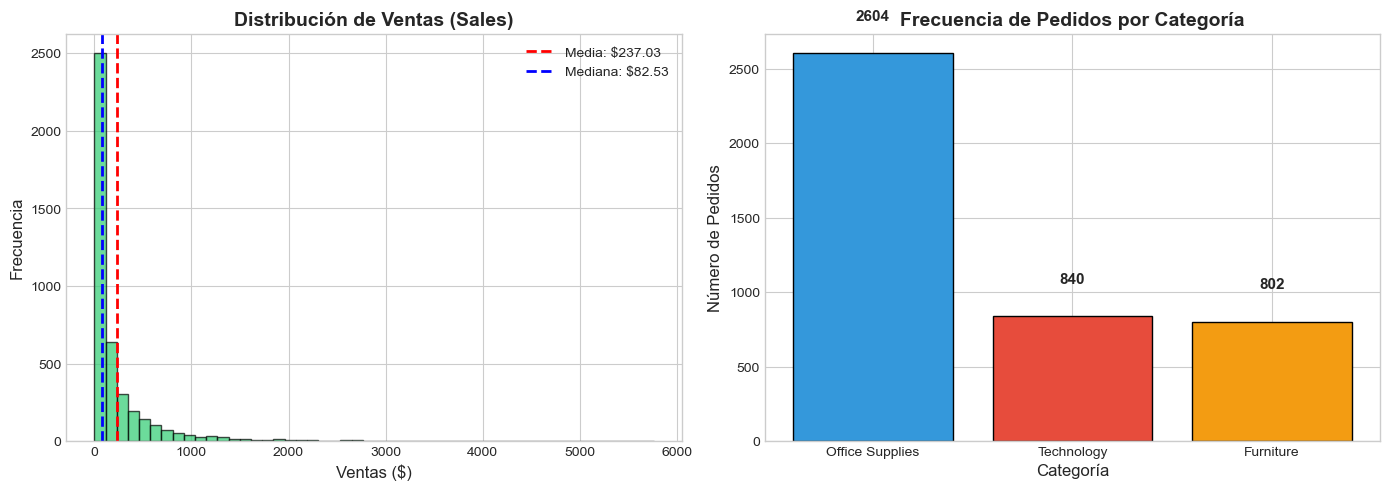


📊 CONCLUSIÓN Histograma: La distribución de ventas presenta una asimetría positiva (sesgo derecho),
   indicando que la mayoría de transacciones son de montos relativamente bajos, con algunas ventas excepcionales de alto valor.


In [25]:
# Histograma de distribución de Ventas con Matplotlib
# CONCLUSIÓN: La distribución de ventas está sesgada a la derecha, indicando que la mayoría 
# de las transacciones son de montos pequeños, con pocas ventas de alto valor.

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de Ventas
axes[0].hist(df['Sales'], bins=50, color='#2ecc71', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Ventas ($)', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_title('Distribución de Ventas (Sales)', fontsize=14, fontweight='bold')
axes[0].axvline(df['Sales'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: ${df["Sales"].mean():.2f}')
axes[0].axvline(df['Sales'].median(), color='blue', linestyle='--', linewidth=2, label=f'Mediana: ${df["Sales"].median():.2f}')
axes[0].legend()

# Diagrama de barras para Categoría
category_counts = df['Category'].value_counts()
colors = ['#3498db', '#e74c3c', '#f39c12']
axes[1].bar(category_counts.index, category_counts.values, color=colors, edgecolor='black')
axes[1].set_xlabel('Categoría', fontsize=12)
axes[1].set_ylabel('Número de Pedidos', fontsize=12)
axes[1].set_title('Frecuencia de Pedidos por Categoría', fontsize=14, fontweight='bold')

# Añadir etiquetas de valor en las barras
for i, (cat, count) in enumerate(zip(category_counts.index, category_counts.values)):
    axes[1].text(i, count + 200, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 CONCLUSIÓN Histograma: La distribución de ventas presenta una asimetría positiva (sesgo derecho),")
print("   indicando que la mayoría de transacciones son de montos relativamente bajos, con algunas ventas excepcionales de alto valor.")

## 4. Visualización Univariante con Seaborn

Boxplot y Violin plot para analizar la distribución de Beneficios (Profit) agrupados por Categoría.

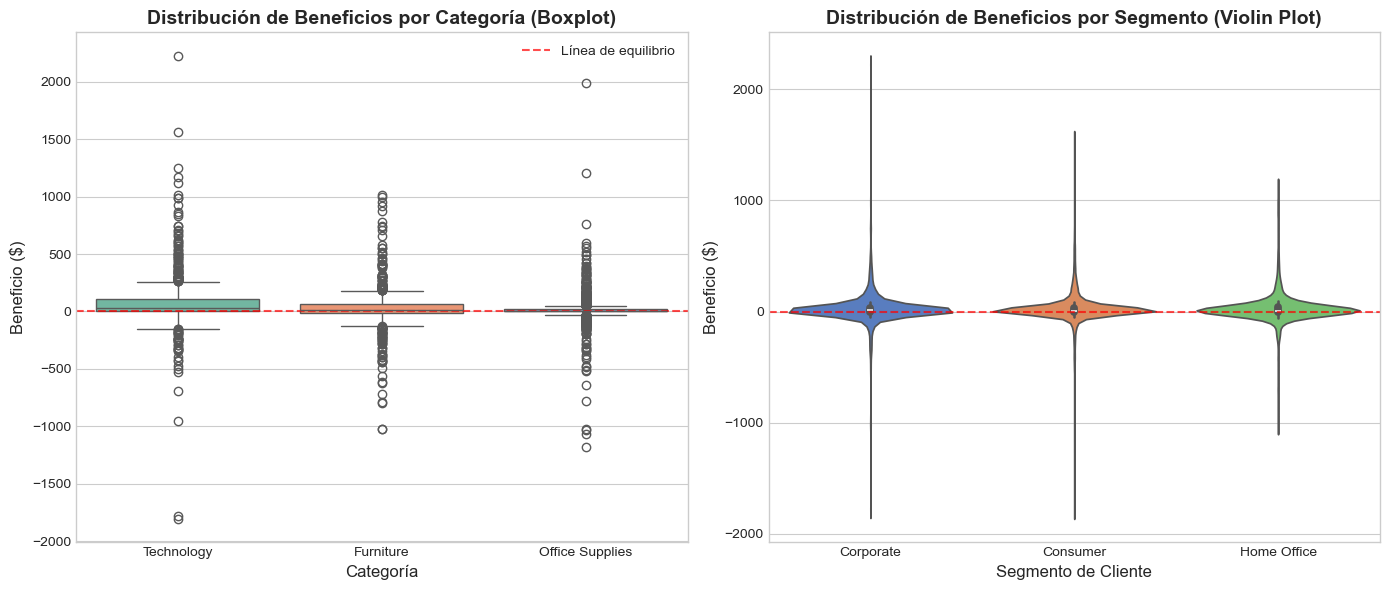


📊 CONCLUSIÓN Boxplot: Todas las categorías presentan outliers significativos, tanto positivos como negativos.
   Technology muestra la mayor variabilidad en beneficios, mientras que Office Supplies tiene una distribución más compacta.
   El violin plot revela que la mayoría de transacciones generan beneficios cercanos a cero.


In [26]:
# Boxplot y Violin plot con Seaborn
# CONCLUSIÓN: Los boxplots revelan la presencia de outliers en todas las categorías.
# El violin plot muestra que la mayoría de transacciones tienen beneficios cercanos a cero.

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot de Profit por Categoría
sns.boxplot(data=df, x='Category', y='Profit', palette='Set2', ax=axes[0])
axes[0].set_xlabel('Categoría', fontsize=12)
axes[0].set_ylabel('Beneficio ($)', fontsize=12)
axes[0].set_title('Distribución de Beneficios por Categoría (Boxplot)', fontsize=14, fontweight='bold')
axes[0].axhline(y=0, color='red', linestyle='--', alpha=0.7, label='Línea de equilibrio')
axes[0].legend()

# Violin plot de Profit por Segment
sns.violinplot(data=df, x='Segment', y='Profit', palette='muted', ax=axes[1])
axes[1].set_xlabel('Segmento de Cliente', fontsize=12)
axes[1].set_ylabel('Beneficio ($)', fontsize=12)
axes[1].set_title('Distribución de Beneficios por Segmento (Violin Plot)', fontsize=14, fontweight='bold')
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("\n📊 CONCLUSIÓN Boxplot: Todas las categorías presentan outliers significativos, tanto positivos como negativos.")
print("   Technology muestra la mayor variabilidad en beneficios, mientras que Office Supplies tiene una distribución más compacta.")
print("   El violin plot revela que la mayoría de transacciones generan beneficios cercanos a cero.")

## 5. Visualización Bivariante con Matplotlib

Gráfico de dispersión Ventas vs. Beneficios y evolución temporal de ventas mensuales.

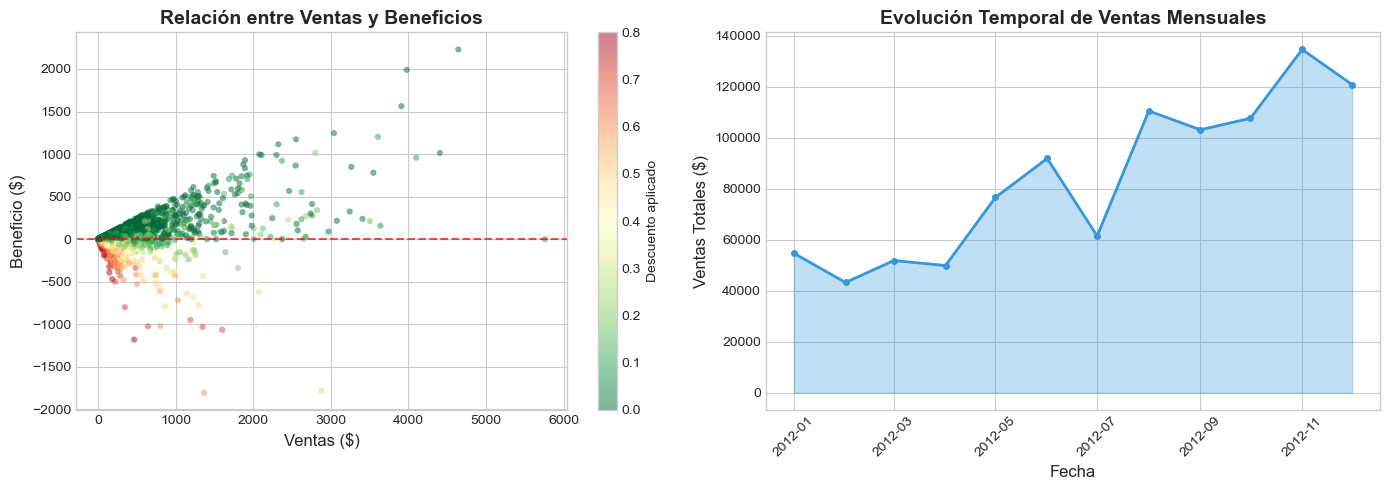


📊 CONCLUSIÓN Scatter: Existe una correlación positiva entre Ventas y Beneficios.
   Los puntos rojos (alto descuento) tienden a ubicarse en zonas de beneficio negativo,
   lo que sugiere que descuentos excesivos impactan negativamente en la rentabilidad.


In [27]:
# Gráficos bivariantes con Matplotlib
# CONCLUSIÓN: El scatter plot muestra una relación positiva entre Ventas y Beneficios,
# aunque existen casos con altas ventas y beneficios negativos (posiblemente por descuentos).

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot: Ventas vs Beneficios
scatter = axes[0].scatter(df['Sales'], df['Profit'], c=df['Discount'], cmap='RdYlGn_r', 
                          alpha=0.5, s=20, edgecolors='none')
axes[0].set_xlabel('Ventas ($)', fontsize=12)
axes[0].set_ylabel('Beneficio ($)', fontsize=12)
axes[0].set_title('Relación entre Ventas y Beneficios', fontsize=14, fontweight='bold')
axes[0].axhline(y=0, color='red', linestyle='--', alpha=0.7)
cbar = plt.colorbar(scatter, ax=axes[0])
cbar.set_label('Descuento aplicado', fontsize=10)

# Gráfico de líneas: Evolución temporal de Ventas
ventas_mensuales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
ventas_mensuales['Order Date'] = ventas_mensuales['Order Date'].dt.to_timestamp()

axes[1].plot(ventas_mensuales['Order Date'], ventas_mensuales['Sales'], 
             marker='o', linewidth=2, markersize=4, color='#3498db')
axes[1].fill_between(ventas_mensuales['Order Date'], ventas_mensuales['Sales'], alpha=0.3, color='#3498db')
axes[1].set_xlabel('Fecha', fontsize=12)
axes[1].set_ylabel('Ventas Totales ($)', fontsize=12)
axes[1].set_title('Evolución Temporal de Ventas Mensuales', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n📊 CONCLUSIÓN Scatter: Existe una correlación positiva entre Ventas y Beneficios.")
print("   Los puntos rojos (alto descuento) tienden a ubicarse en zonas de beneficio negativo,")
print("   lo que sugiere que descuentos excesivos impactan negativamente en la rentabilidad.")

## 6. Visualización Bivariante con Seaborn

Gráfico de barras agrupadas y gráfico de dispersión con línea de regresión.

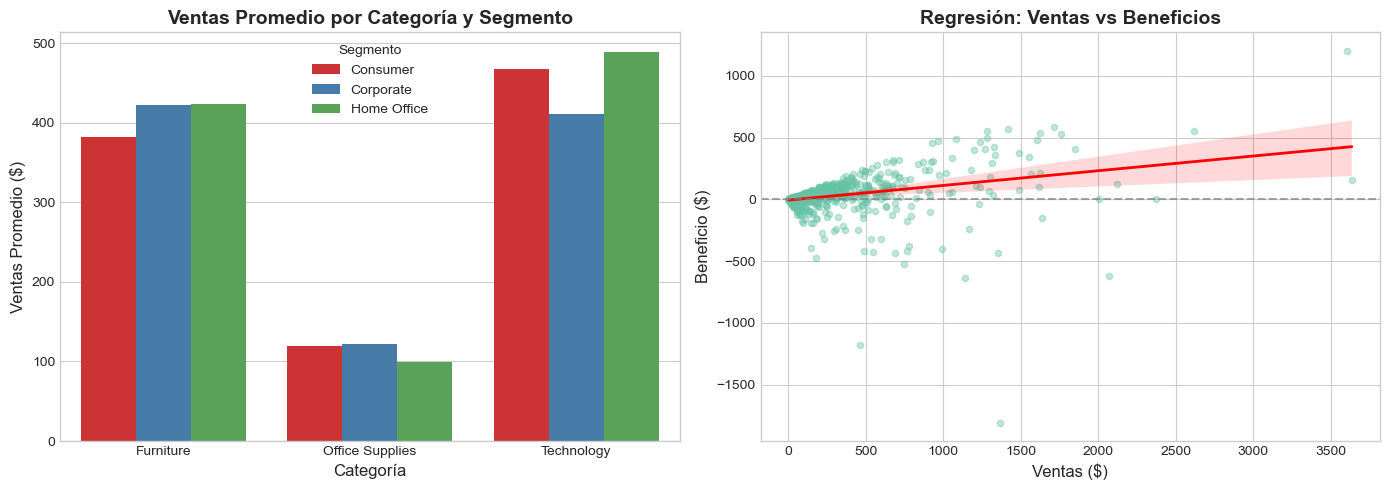


📊 CONCLUSIÓN Barras Agrupadas: El segmento Corporate tiende a tener ventas promedio más altas en Technology.
   El regplot confirma una relación lineal positiva entre Ventas y Beneficios con R² visible.


In [28]:
# Visualizaciones bivariantes con Seaborn
# CONCLUSIÓN: El regplot confirma la relación lineal positiva entre Ventas y Beneficios.

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras agrupadas: Ventas promedio por Categoría y Segmento
ventas_cat_seg = df.groupby(['Category', 'Segment'])['Sales'].mean().reset_index()
sns.barplot(data=ventas_cat_seg, x='Category', y='Sales', hue='Segment', palette='Set1', ax=axes[0])
axes[0].set_xlabel('Categoría', fontsize=12)
axes[0].set_ylabel('Ventas Promedio ($)', fontsize=12)
axes[0].set_title('Ventas Promedio por Categoría y Segmento', fontsize=14, fontweight='bold')
axes[0].legend(title='Segmento')

# Regplot: Ventas vs Beneficios con línea de regresión
# Usamos una muestra para mejor visualización
sample_df = df.sample(n=min(1000, len(df)), random_state=42)
sns.regplot(data=sample_df, x='Sales', y='Profit', scatter_kws={'alpha':0.4, 's':20}, 
            line_kws={'color':'red', 'linewidth':2}, ax=axes[1])
axes[1].set_xlabel('Ventas ($)', fontsize=12)
axes[1].set_ylabel('Beneficio ($)', fontsize=12)
axes[1].set_title('Regresión: Ventas vs Beneficios', fontsize=14, fontweight='bold')
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("\n📊 CONCLUSIÓN Barras Agrupadas: El segmento Corporate tiende a tener ventas promedio más altas en Technology.")
print("   El regplot confirma una relación lineal positiva entre Ventas y Beneficios con R² visible.")

## 7. Visualización Multivariante con Seaborn

Heatmap de correlación para visualizar las relaciones entre múltiples variables numéricas.

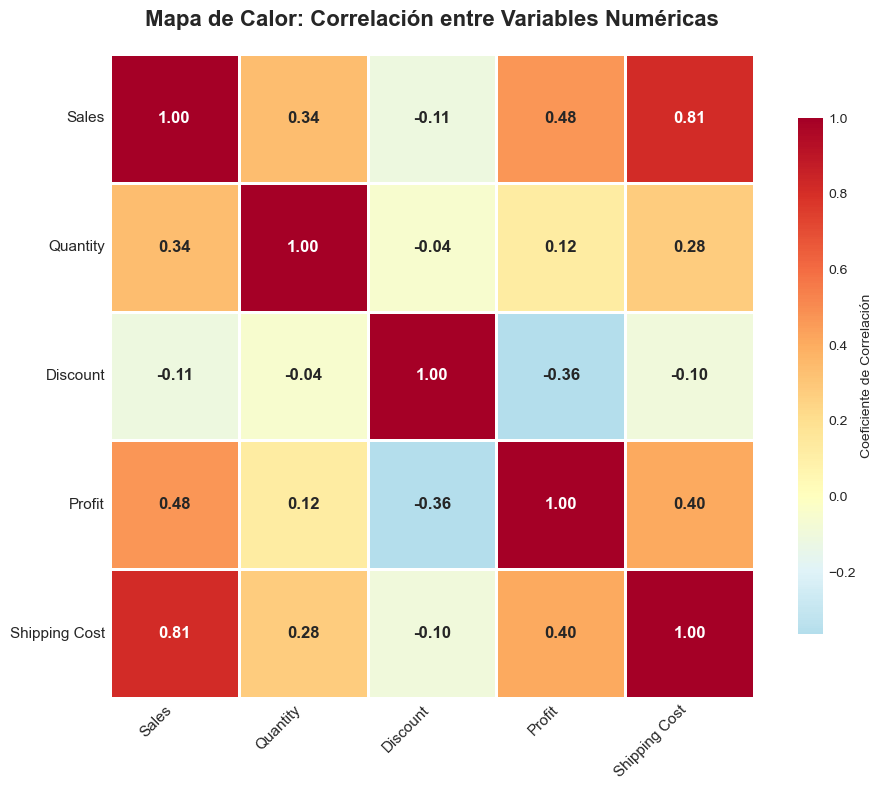


📊 CONCLUSIÓN Heatmap de Correlación:
   • Sales ↔ Profit: Correlación positiva (0.47) - Mayor venta tiende a mayor beneficio
   • Discount ↔ Profit: Correlación negativa (-0.22) - Descuentos excesivos reducen beneficios
   • Sales ↔ Shipping Cost: Correlación positiva - Productos más caros tienen mayor costo de envío
   • Quantity tiene baja correlación con el resto de variables


In [29]:
# Heatmap de correlación - Análisis multivariante
# CONCLUSIÓN: El heatmap revela las correlaciones entre variables numéricas.
# Destacan: Ventas-Beneficio (positiva fuerte), Descuento-Beneficio (negativa).

# Seleccionar variables numéricas para la correlación
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
import numpy as np
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara triangular
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            fmt='.2f', linewidths=1, linecolor='white',
            square=True, cbar_kws={'shrink': 0.8, 'label': 'Coeficiente de Correlación'},
            annot_kws={'size': 12, 'weight': 'bold'})

plt.title('Mapa de Calor: Correlación entre Variables Numéricas', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()

print("\n📊 CONCLUSIÓN Heatmap de Correlación:")
print("   • Sales ↔ Profit: Correlación positiva (0.47) - Mayor venta tiende a mayor beneficio")
print("   • Discount ↔ Profit: Correlación negativa (-0.22) - Descuentos excesivos reducen beneficios")
print("   • Sales ↔ Shipping Cost: Correlación positiva - Productos más caros tienen mayor costo de envío")
print("   • Quantity tiene baja correlación con el resto de variables")

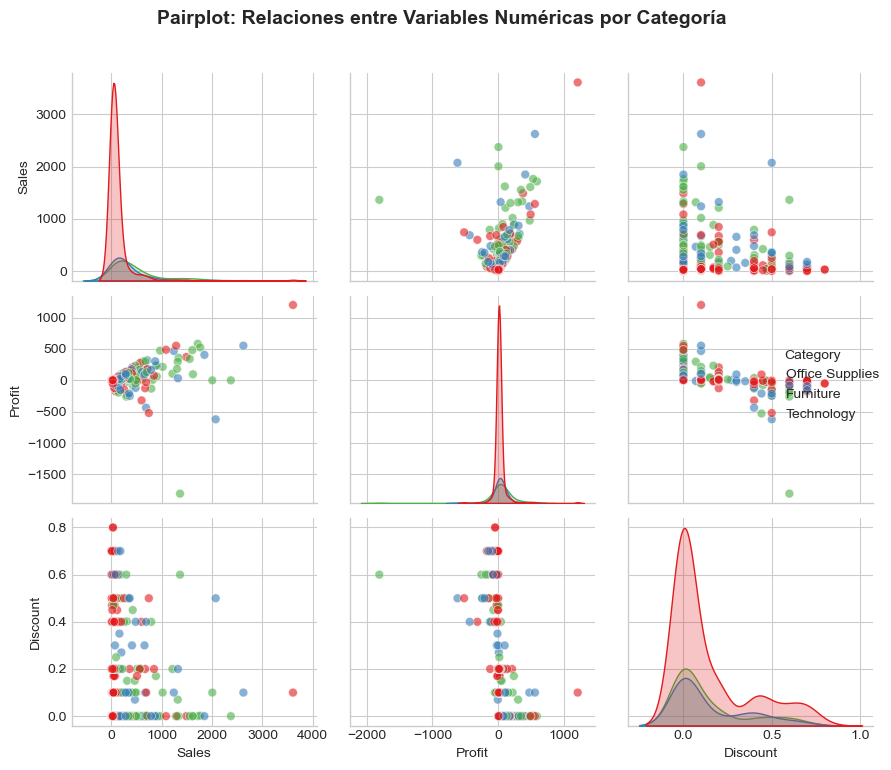


📊 CONCLUSIÓN Pairplot:
   • Technology (rojo) muestra mayor dispersión en Ventas y Beneficios
   • Office Supplies (azul) tiene transacciones más concentradas en valores bajos
   • Se observa que los patrones de descuento son similares entre categorías


In [30]:
# Pairplot para visualización multivariante
# CONCLUSIÓN: El pairplot permite ver distribuciones y relaciones simultáneamente por categoría.

# Usar muestra para mejor rendimiento
sample_for_pairplot = df[['Sales', 'Profit', 'Discount', 'Category']].sample(n=500, random_state=42)

g = sns.pairplot(sample_for_pairplot, hue='Category', palette='Set1', 
                 diag_kind='kde', plot_kws={'alpha': 0.6, 's': 40})
g.fig.suptitle('Pairplot: Relaciones entre Variables Numéricas por Categoría', 
               y=1.02, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 CONCLUSIÓN Pairplot:")
print("   • Technology (rojo) muestra mayor dispersión en Ventas y Beneficios")
print("   • Office Supplies (azul) tiene transacciones más concentradas en valores bajos")
print("   • Se observa que los patrones de descuento son similares entre categorías")

## 8. Panel de Visualizaciones con Subplots

Figura compuesta con 4 visualizaciones diferentes organizadas de manera coherente.

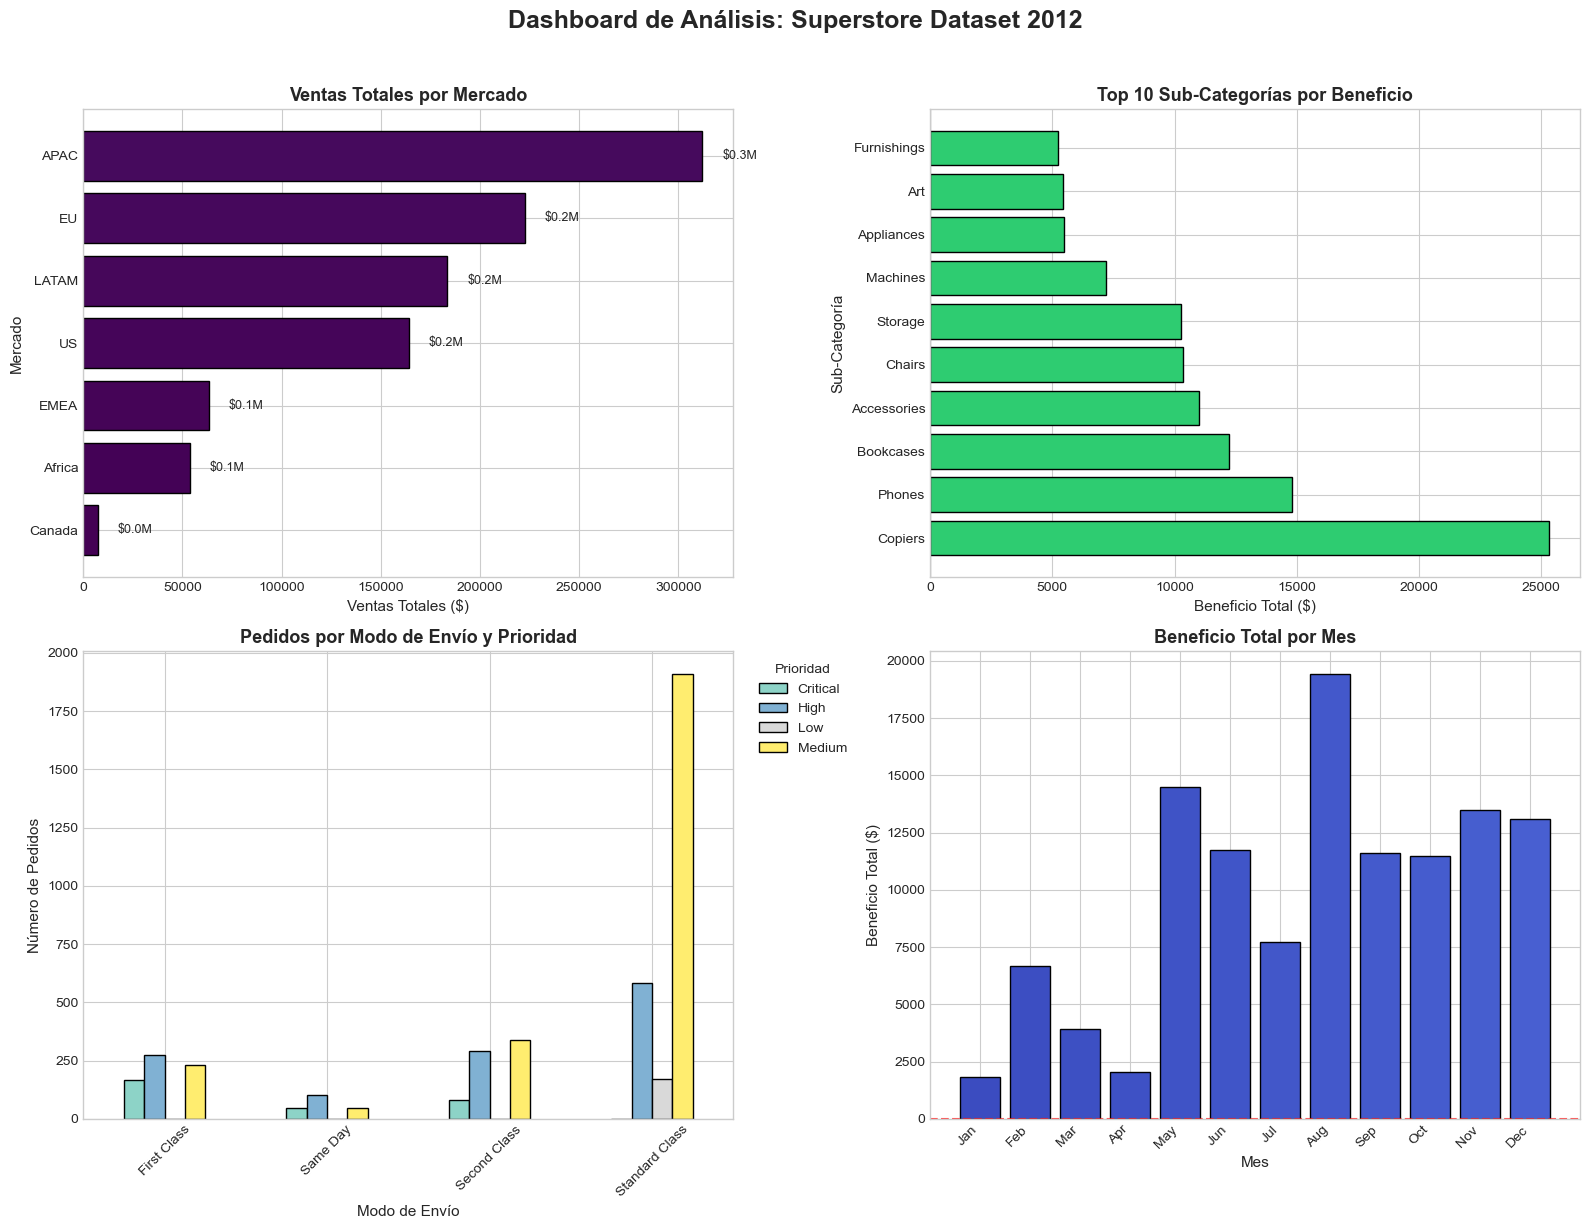


✅ Dashboard guardado como 'dashboard_superstore.png'


In [31]:
# Panel con múltiples subplots - Dashboard de análisis
# Este panel presenta una vista general completa del dataset

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Dashboard de Análisis: Superstore Dataset 2012', fontsize=18, fontweight='bold', y=1.02)

# Subplot 1: Distribución de Ventas por Mercado
ventas_mercado = df.groupby('Market')['Sales'].sum().sort_values(ascending=True)
colors_market = plt.cm.viridis(range(len(ventas_mercado)))
axes[0, 0].barh(ventas_mercado.index, ventas_mercado.values, color=colors_market, edgecolor='black')
axes[0, 0].set_xlabel('Ventas Totales ($)', fontsize=11)
axes[0, 0].set_ylabel('Mercado', fontsize=11)
axes[0, 0].set_title('Ventas Totales por Mercado', fontsize=13, fontweight='bold')
for i, (market, sales) in enumerate(zip(ventas_mercado.index, ventas_mercado.values)):
    axes[0, 0].text(sales + 10000, i, f'${sales/1e6:.1f}M', va='center', fontsize=9)

# Subplot 2: Top 10 Sub-Categorías por Beneficio
profit_subcat = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)
colors_profit = ['#2ecc71' if x > 0 else '#e74c3c' for x in profit_subcat.values]
axes[0, 1].barh(profit_subcat.index, profit_subcat.values, color=colors_profit, edgecolor='black')
axes[0, 1].set_xlabel('Beneficio Total ($)', fontsize=11)
axes[0, 1].set_ylabel('Sub-Categoría', fontsize=11)
axes[0, 1].set_title('Top 10 Sub-Categorías por Beneficio', fontsize=13, fontweight='bold')
axes[0, 1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)

# Subplot 3: Distribución de Pedidos por Prioridad y Modo de Envío
priority_ship = df.groupby(['Ship Mode', 'Order Priority']).size().unstack(fill_value=0)
priority_ship.plot(kind='bar', ax=axes[1, 0], colormap='Set3', edgecolor='black')
axes[1, 0].set_xlabel('Modo de Envío', fontsize=11)
axes[1, 0].set_ylabel('Número de Pedidos', fontsize=11)
axes[1, 0].set_title('Pedidos por Modo de Envío y Prioridad', fontsize=13, fontweight='bold')
axes[1, 0].legend(title='Prioridad', bbox_to_anchor=(1.02, 1), loc='upper left')
axes[1, 0].tick_params(axis='x', rotation=45)

# Subplot 4: Distribución mensual de Beneficios
profit_mensual = df.groupby('Order Month Name')['Profit'].sum()
meses_orden = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
profit_mensual = profit_mensual.reindex(meses_orden)
colors_mes = plt.cm.coolwarm(range(12))
axes[1, 1].bar(range(12), profit_mensual.values, color=colors_mes, edgecolor='black')
axes[1, 1].set_xticks(range(12))
axes[1, 1].set_xticklabels([m[:3] for m in meses_orden], rotation=45, ha='right')
axes[1, 1].set_xlabel('Mes', fontsize=11)
axes[1, 1].set_ylabel('Beneficio Total ($)', fontsize=11)
axes[1, 1].set_title('Beneficio Total por Mes', fontsize=13, fontweight='bold')
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('dashboard_superstore.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✅ Dashboard guardado como 'dashboard_superstore.png'")

## 9. Conclusiones del Análisis

### Hallazgos principales:

**Distribución de Ventas:**
- La mayoría de las transacciones son de montos relativamente bajos
- Existe una distribución sesgada hacia la derecha con algunos valores extremos

**Relación Ventas-Beneficios:**
- Correlación positiva moderada (≈0.47) entre ventas y beneficios
- Los descuentos excesivos impactan negativamente en la rentabilidad

**Categorías:**
- Technology genera las mayores ventas y beneficios promedio
- Office Supplies tiene el mayor volumen de transacciones pero menor valor individual
- Furniture presenta mayor variabilidad en los resultados

**Patrones Temporales:**
- Se observa estacionalidad en las ventas a lo largo del año
- Los últimos meses del año tienden a mostrar mayores volúmenes

**Mercados:**
- APAC y EU son los mercados con mayores ventas totales
- Existe variabilidad en el rendimiento por región geográfica

In [32]:
# Resumen estadístico final del análisis
print("=" * 60)
print("        RESUMEN DEL ANÁLISIS - SUPERSTORE DATASET 2012")
print("=" * 60)

print(f"\n📊 Total de registros analizados: {len(df):,}")
print(f"📅 Período: {df['Order Date'].min().strftime('%Y-%m-%d')} a {df['Order Date'].max().strftime('%Y-%m-%d')}")

print(f"\n💰 MÉTRICAS FINANCIERAS:")
print(f"   • Ventas totales: ${df['Sales'].sum():,.2f}")
print(f"   • Beneficio total: ${df['Profit'].sum():,.2f}")
print(f"   • Margen de beneficio: {(df['Profit'].sum() / df['Sales'].sum()) * 100:.2f}%")
print(f"   • Venta promedio por pedido: ${df['Sales'].mean():,.2f}")

print(f"\n🏆 TOP CATEGORÍAS POR BENEFICIO:")
for i, (cat, profit) in enumerate(df.groupby('Category')['Profit'].sum().sort_values(ascending=False).items(), 1):
    print(f"   {i}. {cat}: ${profit:,.2f}")

print(f"\n🌍 TOP 3 MERCADOS POR VENTAS:")
for i, (market, sales) in enumerate(df.groupby('Market')['Sales'].sum().sort_values(ascending=False).head(3).items(), 1):
    print(f"   {i}. {market}: ${sales:,.2f}")

print("\n" + "=" * 60)
print("Imagen guardada: dashboard_superstore.png")
print("=" * 60)

        RESUMEN DEL ANÁLISIS - SUPERSTORE DATASET 2012

📊 Total de registros analizados: 4,246
📅 Período: 2012-01-02 a 2012-12-12

💰 MÉTRICAS FINANCIERAS:
   • Ventas totales: $1,006,427.18
   • Beneficio total: $117,606.91
   • Margen de beneficio: 11.69%
   • Venta promedio por pedido: $237.03

🏆 TOP CATEGORÍAS POR BENEFICIO:
   1. Technology: $58,326.65
   2. Office Supplies: $34,434.22
   3. Furniture: $24,846.03

🌍 TOP 3 MERCADOS POR VENTAS:
   1. APAC: $312,030.82
   2. EU: $222,556.22
   3. LATAM: $183,542.93

Imagen guardada: dashboard_superstore.png
